#### 10.03.25, &copy; Dmytro Sokhin KI-21-1, 2025

# Лабораторна робота #3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією.

**Мета**: закріпити на практиці використання алгоритмів регуляризації в задачах оптимізації функціонала якості засобами мови Python

## Що ви будете вміти?
* Використовувати L2- та L1-регуляризатори в задачах регресії та класифікації
* Реалізувати простий лінійний бінарний класифікатор на основі оптимізації функціонала якості стохастичним градієнтним спуском з регуляризаторами засобами мови Python

## Завдання для самостійної роботи 

1. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1. Проаналізувати результати.

Коефіцієнти полінома:
[-2.86702022e-08 -1.33002085e-06  5.08934803e-05 -5.05674274e-04
  1.10287551e-03  5.86600435e-03  3.40792431e-03 -1.69416305e-01
  1.14333937e-03  9.99820603e-01  2.89978400e-07]


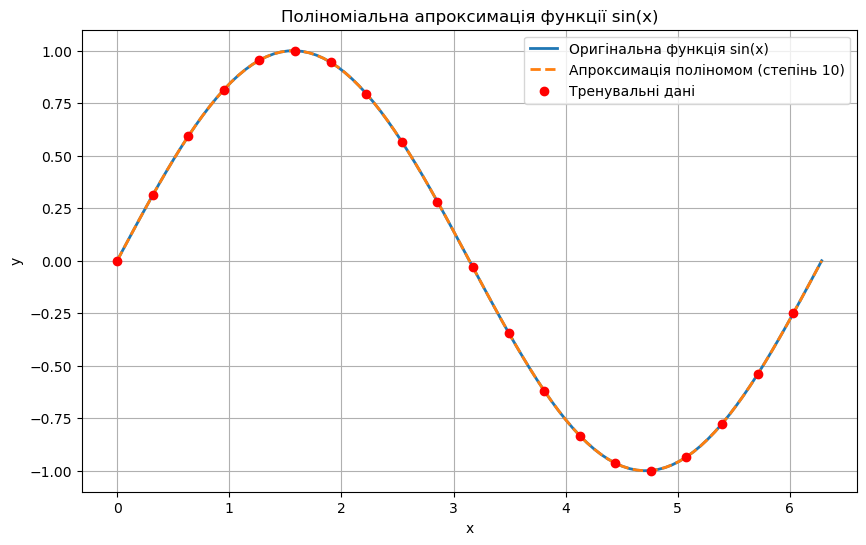

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функція, яку апроксимуємо
def f(x):
    return np.sin(x)

# Створення даних: рівномірний розподіл точок для інтервалу [0, 2π]
x = np.linspace(0, 2 * np.pi, 100)
y = f(x)

# Вибір тренувальних даних: наприклад, кожна 5-та точка
x_train = x[::5]
y_train = y[::5]

# Підгонка полінома 10-го степеня до тренувальних даних
degree = 10
coefficients = np.polyfit(x_train, y_train, degree)
print("Коефіцієнти полінома:")
print(coefficients)

# Створення функції-предиктора на основі знайдених коефіцієнтів
poly_model = np.poly1d(coefficients)

# Обчислення апроксимованих значень по всьому інтервалу
y_pred = poly_model(x)

# Побудова графіку: оригінальна функція, апроксимована модель та тренувальні точки
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Оригінальна функція sin(x)", linewidth=2)
plt.plot(x, y_pred, label=f"Апроксимація поліномом (степінь {degree})", linestyle="--", linewidth=2)
plt.scatter(x_train, y_train, color="red", label="Тренувальні дані", zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поліноміальна апроксимація функції sin(x)")
plt.legend()
plt.grid(True)
plt.show()


Якість апроксимації:
На тренувальних точках апроксимована функція точно збігається з f(x)=sin(x) Проте між тренувальними точками та на краях інтервалу може спостерігатися невелике відхилення, що характерно для апроксимації поліномами високого степеня.

Коефіцієнти полінома:
Значення коефіцієнтів, отримані методом найменших квадратів, можуть свідчити про зростання значень коефіцієнтів при збільшенні степеня. Це відображає адаптацію полінома до складної форми функції, але одночасно може вказувати на потенційне перенавчання (overfitting) або наявність явища Рунге (Runge phenomenon).

2. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 2. Проаналізувати результати.  

Коефіцієнти полінома:
[ 2.60790963e-01  1.76672388e-01 -9.62469243e-02 -1.47055153e-01
 -1.47914628e-01  8.84922780e-03  1.67602919e-01 -1.09245254e-01
  3.13564162e-02 -4.92170773e-03  4.39159809e-04 -2.09688048e-05
  4.16958006e-07]


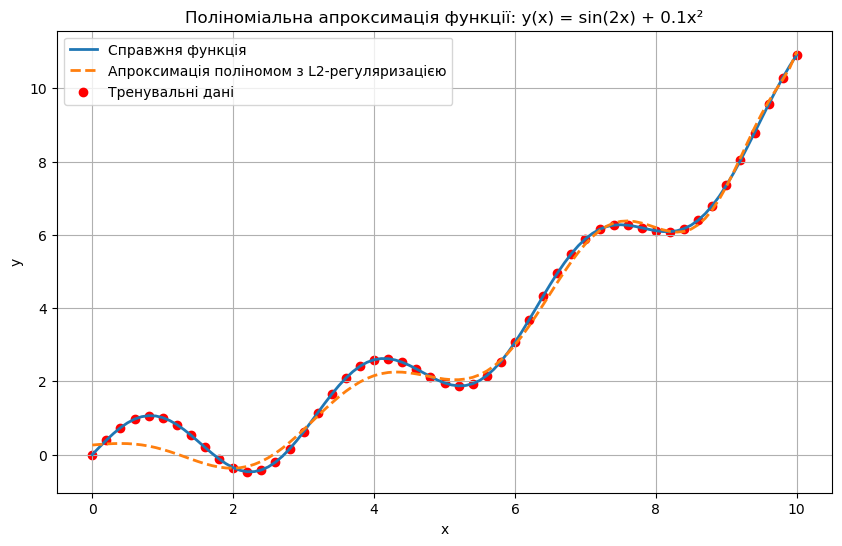

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генеруємо дані
x = np.arange(0, 10.1, 0.1)
y = np.sin(2 * x) + 0.1 * (x ** 2)  # функція: sin(2x) + 0.1*x^2

# Вибір тренувальних даних: кожна друга точка
x_train = x[::2]
y_train = y[::2]

# Визначення розміру простору ознак: N коефіцієнтів (поліном ступеня N-1)
N = 13  # тобто поліном 12-го степеня
L = 20  # параметр регуляризації

# Побудова матриці ознак для всіх x
X = np.array([[a ** n for n in range(N)] for a in x])
# Побудова матриці ознак для тренувальних даних
X_train = X[::2]
Y = y_train  # вектор тренувальних міток

# Побудова матриці регуляризації: lambda*I, де перший коефіцієнт не регуляризується
IL = np.diag([0] + [L] * (N - 1))

# Обчислення коефіцієнтів за формулою:
# w = (X_train^T * X_train + lambda*I)^(-1) * X_train^T * Y
w = np.linalg.inv(X_train.T @ X_train + IL) @ (X_train.T @ Y)
print("Коефіцієнти полінома:")
print(w)

# Прогнозування значень за допомогою апроксимуючого полінома для всіх x
yy = np.array([np.dot(w, row) for row in X])

# Побудова графіка: справжня функція та апроксимована модель
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Справжня функція", linewidth=2)
plt.plot(x, yy, label="Апроксимація поліномом з L2-регуляризацією", linestyle="--", linewidth=2)
plt.scatter(x_train, y_train, color="red", label="Тренувальні дані")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поліноміальна апроксимація функції: y(x) = sin(2x) + 0.1x²")
plt.legend()
plt.grid(True)
plt.show()

Якість апроксимації:
За рахунок L2-регуляризації модель знаходить компроміс між точністю апроксимації на тренувальних даних та загальною стабільністю моделі. Регуляризація зменшує вплив коефіцієнтів високих степенів, що допомагає уникнути коливань (overfitting) на межах інтервалу.

Вплив регуляризації:
Параметр L визначає силу регуляризації. При достатньому значенні регуляризація допомагає згладити апроксимацію, зменшуючи великі коефіцієнти, що відповідають членам з високими степенями. Це може призвести до дещо нижчої точності на тренувальних даних, але покращує узагальнення моделі.

3. Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 *для даних свого варіанту*, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).

Остаточні ваги: [2.73974190e-05 1.29661470e-06 9.68397419e-03 6.94296615e-03
 3.17347017e-03]
Остаточний емпіричний ризик: 0.8021562329632579


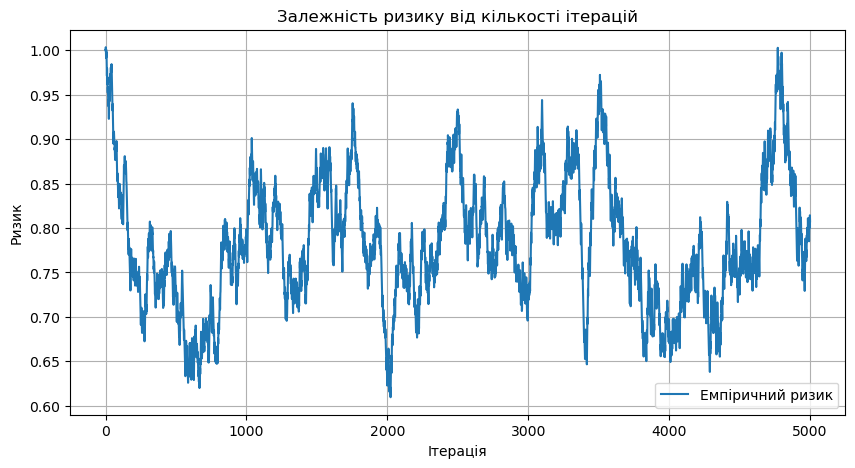

Прогнозовані мітки: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Справжні мітки: [ 1 -1  1  1 -1 -1 -1  1  1  1]


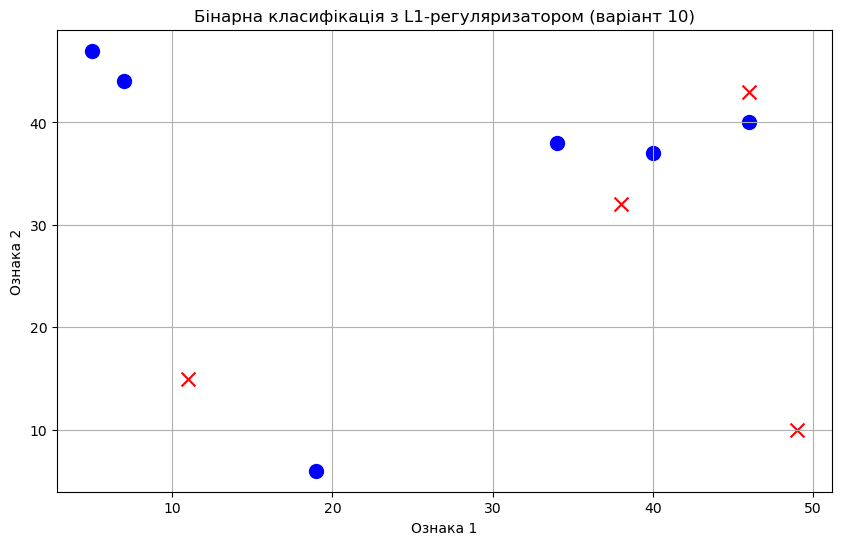

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Імпорт даних для навчальної вибірки з файлу
with open("data_variant10.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    
# Отримання даних: x_train_10 – матриця ознак, y_train_10 – вектор міток
x_train = data["x_train_10"]
y_train = data["y_train_10"]

# Для розширення простору ознак (додавання додаткових ознак) застосуємо перетворення:
# До кожного вектора з двох ознак додаємо три додаткових: 10*x1, 10*x2, 5*(x1+x2)
x_train = [x + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array(y_train)

# --- Визначення функції втрат і її похідної (з L1-регуляризацією) ---

# Сигмоїдна функція втрат (чим більший добуток w*x та y, тим менше втрати)
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна функції втрат по вектору w з L1-регуляризацією
def df(w, x, y):
    L1 = 1.0  # коефіцієнт L1-регуляризатора (можна регулювати для зміни сили регуляризації)
    M = np.dot(w, x) * y
    # Похідна від сигмоїдальної функції втрат плюс внесок L1-регуляризації
    return -2 * (1 + np.exp(M))**(-2) * np.exp(M) * x * y + L1 * np.sign(w)

# --- Налаштування параметрів навчання ---

n_features = len(x_train[0])  # розмір вектора ознак (у нашому випадку 5)
n_train = len(x_train)        # кількість навчальних прикладів
w = np.zeros(n_features)      # початкове значення ваг (ініціалізуємо нулями)

nt = 0.00001  # крок навчання (learning rate)
lm = 0.01     # коефіцієнт "забування" для згладжування показника якості
N = 5000      # кількість ітерацій стохастичного градієнтного спуску (SGD)

# Обчислення початкового значення показника якості (емпіричний ризик)
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

# --- Стохастичний градієнтний спуск (SGD) ---
for i in range(N):
    k = np.random.randint(0, n_train)         # випадковий вибір індексу з навчальної вибірки
    ek = loss(w, x_train[k], y_train[k])        # обчислення втрат для обраного прикладу
    w = w - nt * df(w, x_train[k], y_train[k])    # оновлення ваг згідно з SGD з L1-регуляризацією
    Q = lm * ek + (1 - lm) * Q                  # згладжене оновлення показника якості
    Q_plot.append(Q)

# Обчислення остаточного значення емпіричного ризику
Q_final = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
print("Остаточні ваги:", w)
print("Остаточний емпіричний ризик:", Q_final)

# --- Візуалізація процесу навчання ---
plt.figure(figsize=(10, 5))
plt.plot(Q_plot, label="Емпіричний ризик")
plt.xlabel("Ітерація")
plt.ylabel("Ризик")
plt.title("Залежність ризику від кількості ітерацій")
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку результатів класифікації ---

# Прогноз: для кожного навчального прикладу визначаємо знак (positive або negative) від скалярного добутку w і вектора ознак
predictions = np.array([np.sign(np.dot(w, x)) for x in x_train])

print("Прогнозовані мітки:", predictions)
print("Справжні мітки:", y_train)

# Для побудови графіку класифікації використаємо перші дві ознаки (оригінальні дані)
plt.figure(figsize=(10, 6))
for point, true_label, pred_label in zip(x_train, y_train, predictions):
    # Встановлюємо колір залежно від істинного класу: синій для +1, червоний для -1
    color = "blue" if true_label == 1 else "red"
    # Якщо прогноз вірний, маркер "o", інакше "x"
    marker = "o" if true_label == pred_label else "x"
    plt.scatter(point[0], point[1], color=color, marker=marker, s=100)

plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.title("Бінарна класифікація з L1-регуляризатором (варіант 10)")
plt.grid(True)
plt.show()


В кінці навчання виводяться остаточні ваги та емпіричний ризик, що дає змогу оцінити якість навчання.
Графік залежності ризику від ітерацій демонструє, як у процесі навчання значення функції втрат змінюється (зазвичай знижується).

На графіку класифікації кожен приклад позначено відповідним кольором (синій для позитивного класу, червоний для негативного) та маркером ("o" для правильно класифікованих, "x" для помилково класифікованих). Цей графік дозволяє візуально оцінити, наскільки добре модель розділяє класи за допомогою перших двох ознак.

4. Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. Проаналізувати отримані результати і порівняти їх з попередніми результатами.

Остаточні ваги (L2-регуляризація): [-0.00555587  0.00278337 -0.05555865  0.02783371 -0.01386247]
Остаточний емпіричний ризик (L2-регуляризація): 0.8062463358029088


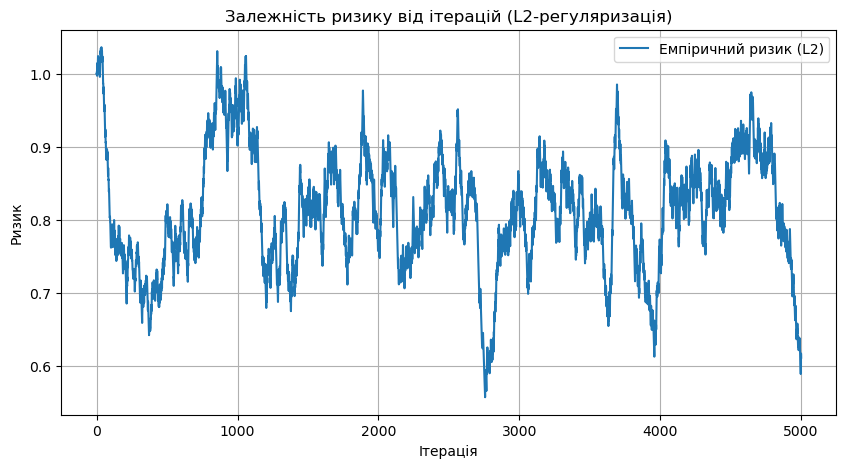

Прогнозовані мітки (L2): [-1. -1. -1. -1. -1. -1. -1.  1. -1.  1.]
Справжні мітки: [ 1 -1  1  1 -1 -1 -1  1  1  1]


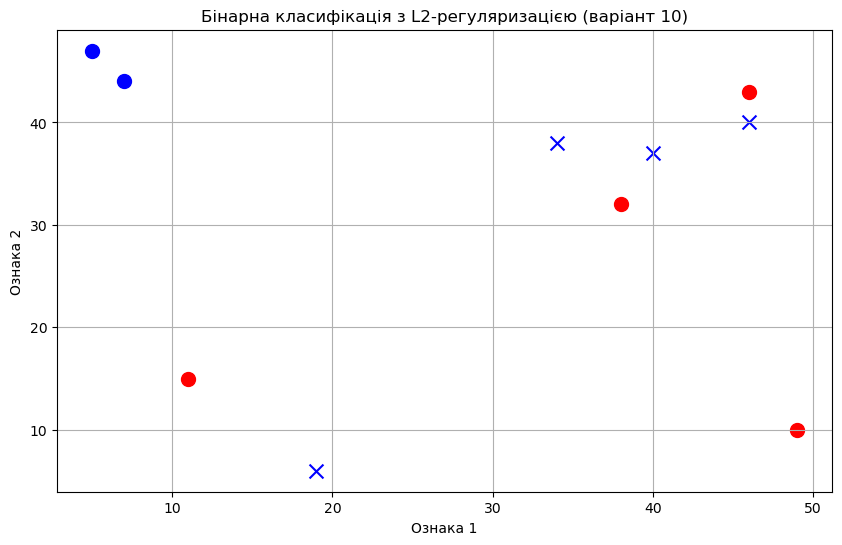

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Імпортуємо дані для навчальної вибірки з файлу "data_variant10.json"
with open("data_variant10.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Отримання даних: x_train_10 – матриця ознак, y_train_10 – вектор міток
x_train = data["x_train_10"]
y_train = data["y_train_10"]

# Розширення простору ознак: до кожного прикладу додаємо додаткові ознаки:
# 10*x1, 10*x2, 5*(x1+x2)
x_train = [x + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array(y_train)

# --- Визначення функції втрат і її похідної з L2-регуляризацією ---

def loss(w, x, y):
    """
    Сигмоїдна функція втрат: чим більший добуток (w·x)*y, тим менше втрати.
    """
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

def df(w, x, y):
    """
    Похідна сигмоїдальної функції втрат по w з додаванням L2-регуляризації.
    Для L2-регуляризації похідна штрафного члена має вигляд 2 * L2 * w.
    """
    L2 = 1.0  # коефіцієнт L2-регуляризації (можна коригувати для зміни сили регуляризації)
    M = np.dot(w, x) * y
    grad_loss = -2 * (1 + np.exp(M))**(-2) * np.exp(M) * x * y
    grad_reg = 2 * L2 * w
    return grad_loss + grad_reg

# --- Налаштування параметрів навчання ---

n_features = len(x_train[0])  # кількість ознак (у нашому випадку 5)
n_train = len(x_train)        # кількість навчальних прикладів
w = np.zeros(n_features)      # ініціалізація ваг нулями

nt = 0.00001  # крок навчання (learning rate)
lm = 0.01     # коефіцієнт згладжування для показника якості
N = 5000      # кількість ітерацій стохастичного градієнтного спуску (SGD)

# Початкове значення емпіричного ризику
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

# --- Стохастичний градієнтний спуск (SGD) з L2-регуляризацією ---

for i in range(N):
    k = np.random.randint(0, n_train)  # вибір випадкового індексу з навчальної вибірки
    ek = loss(w, x_train[k], y_train[k])  # обчислення втрат для обраного прикладу
    w = w - nt * df(w, x_train[k], y_train[k])  # оновлення ваг
    Q = lm * ek + (1 - lm) * Q  # оновлення показника якості (згладжування)
    Q_plot.append(Q)

# Остаточне значення емпіричного ризику
Q_final = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
print("Остаточні ваги (L2-регуляризація):", w)
print("Остаточний емпіричний ризик (L2-регуляризація):", Q_final)

# --- Візуалізація процесу навчання ---

plt.figure(figsize=(10, 5))
plt.plot(Q_plot, label="Емпіричний ризик (L2)")
plt.xlabel("Ітерація")
plt.ylabel("Ризик")
plt.title("Залежність ризику від ітерацій (L2-регуляризація)")
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку класифікації ---

# Прогноз: для кожного прикладу обчислюємо знак (positive або negative) від скалярного добутку w та x
predictions = np.array([np.sign(np.dot(w, x)) for x in x_train])

print("Прогнозовані мітки (L2):", predictions)
print("Справжні мітки:", y_train)

# Для побудови графіку класифікації використаємо перші дві оригінальні ознаки
plt.figure(figsize=(10, 6))
for point, true_label, pred_label in zip(x_train, y_train, predictions):
    # Колір залежить від істинного класу: синій для +1, червоний для -1
    color = "blue" if true_label == 1 else "red"
    # Якщо прогноз вірний, маркер "o", інакше "x"
    marker = "o" if true_label == pred_label else "x"
    plt.scatter(point[0], point[1], color=color, marker=marker, s=100)

plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.title("Бінарна класифікація з L2-регуляризацією (варіант 10)")
plt.grid(True)
plt.show()


Вектор ваг
- L2-регуляризація:
  - Сприяє зменшенню абсолютних значень усіх ваг, але майже всі ознаки залишаються в моделі.
  - Забезпечує більш рівномірне штрафування великих коефіцієнтів, що дає більш стабільну модель при невеликих змінах в даних.

- L1-регуляризація:
  - Сприяє розрідженню вектора ваг, тобто деякі коефіцієнти можуть стати рівними нулю.
  - Це полегшує інтерпретацію моделі, оскільки менш релевантні ознаки фактично виключаються з моделі.

Емпіричний ризик (функція втрат)
- L2-регуляризація:
  - Зазвичай демонструє більш гладке зниження ризику протягом ітерацій навчання.
  - Ризик зменшується рівномірніше завдяки менш різким оновленням ваг, що сприяє стабільності алгоритму.

- L1-регуляризація:
  - Може призводити до більш різких змін ризику, оскільки деякі ваги швидко стають нульовими.
  - Це іноді створює певну нестабільність у процесі навчання, особливо якщо вибір параметрів регуляризації не оптимальний.


5. Дати відповіді на контрольні запитання.

6. Відправити результати роботи у файлі lab_3_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?

**L2-регуляризатор** – це метод регуляризації, який додає до функції втрат суму квадратів коефіцієнтів моделі. Він допомагає зменшити величину ваг, що запобігає перенавчанню. 

- **В регресії:** Використовується як Ridge-регресія, де штраф за великі коефіцієнти робить модель більш стабільною.
- **В класифікації:** Допомагає покращити узагальнення моделі (наприклад, в логістичній регресії чи SVM) шляхом зменшення впливу окремих ознак.

2. Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?

**L1-регуляризація** штрафує суму абсолютних значень ваг, що сприяє отриманню розрідженого вектора (де деякі коефіцієнти стають рівними нулю). **L2-регуляризація** штрафує суму квадратів ваг, що зменшує їх абсолютні значення рівномірно, не призводячи до явного «відсіву» ознак.


3. Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?

In [7]:
import numpy as np

# Приклад навчальної вибірки
# x_train – матриця ознак (без bias), y_train – вектор міток {1, -1}
x_train = np.array([[0.5, 1.0],
                    [1.5, 2.0],
                    [3.0, 4.0],
                    [2.5, 3.0]])
y_train = np.array([1, 1, -1, -1])

# Додавання стовпця одиниць для bias
X = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

# Ініціалізація вектора ваг (bias + 2 ознаки)
w = np.zeros(X.shape[1])

# Налаштування параметрів
learning_rate = 0.01
n_iterations = 1000

# Стохастичний градієнтний спуск (SGD) для персептрона
for i in range(n_iterations):
    # Випадковий вибір одного прикладу
    idx = np.random.randint(0, X.shape[0])
    xi = X[idx]
    yi = y_train[idx]
    
    # Якщо приклад неправильно класифіковано, оновлюємо ваги
    if yi * np.dot(w, xi) <= 0:
        w = w + learning_rate * yi * xi

print("Навчені ваги:", w)

# Функція для прогнозування
def predict(X, w):
    return np.where(np.dot(X, w) >= 0, 1, -1)

# Прогноз на навчальній вибірці
predictions = predict(X, w)
print("Прогнозовані мітки:", predictions)

Навчені ваги: [ 1.00000000e-02 -5.00000000e-03  1.73472348e-18]
Прогнозовані мітки: [ 1  1 -1 -1]


**Підготовка даних:**  
До кожного вектора ознак додається константний компонент (bias).

**Ініціалізація:**  
Ваги ініціалізуються нулями.

**Оновлення ваг:**  
Для кожного випадково вибраного прикладу, якщо прогноз (добуток \(w \cdot x\)) має протилежний знак від істинної мітки, ваги коригуються за правилом:

$$
w \leftarrow w + \eta \cdot y \cdot x
$$

де $$\eta\$$ — швидкість навчання.

**Прогнозування:**  
Після навчання функція `predict` використовує скалярний добуток, щоб визначити клас (якщо \(w \cdot x \ge 0\), то клас 1, інакше — -1).


4. Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?

**Стохастичний градієнтний спуск (SGD)** – це ітеративний метод оптимізації, який оновлює параметри моделі, використовуючи градієнт функції втрат для одного (або невеликої групи) випадкового прикладу на кожній ітерації.

**Основні моменти:**
- **Ітеративне оновлення:** Параметри моделі коригуються поступово за напрямком найшвидшого зниження функції втрат.
- **Випадковість:** На кожній ітерації використовується лише один або декілька випадкових прикладів замість всього набору даних, що значно зменшує обчислювальні витрати.
- **Оптимізація функціонала якості:** Метою є мінімізація функції втрат, яка вимірює різницю між прогнозами моделі та істинними значеннями.

Цей метод особливо ефективний для великих наборів даних, оскільки дозволяє швидко оновлювати модель без обчислення градієнта по всіх даних на кожній ітерації.


5. Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?

- **Зменшення перенавчання:**  
  Обидва регуляризатори додають штраф за великі коефіцієнти, що допомагає зменшити перенавчання моделі і покращити її узагальнення на нових даних.

- **L1-регуляризація:**  
  - Штрафує суму абсолютних значень коефіцієнтів.
  - Сприяє розрідженості моделі, тобто деякі ваги стають рівними нулю.
  - Корисна для відбору найбільш релевантних ознак (feature selection) в задачах класифікації та регресії.

- **L2-регуляризація:**  
  - Штрафує суму квадратів коефіцієнтів.
  - Забезпечує більш рівномірне зменшення ваг, зберігаючи всі ознаки в моделі.
  - Сприяє стабільності моделі та часто використовується для покращення узагальнюючої здатності як в задачах класифікації, так і в регресії.

- **Вплив на навчання:**  
  Регуляризатори можуть уповільнити навчання, додаючи додаткові члени до функції втрат, але це компенсується отриманням моделі з меншою складністю та кращим узагальненням.
